In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

/var/folders/_t/jdd5n8sj505bdpq799l3xt_c0000gn/T/ipykernel_64355/1561118718.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [10]:
# View all of the classes that automap found
print(Base.classes.keys())


['measurement', 'station']


In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [14]:
#find the most recent date
# Query to find the most recent date in the Measurement table

from sqlalchemy import func

most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(f"The most recent date in the data set is: {most_recent_date[0]}")


The most recent date in the data set is: 2


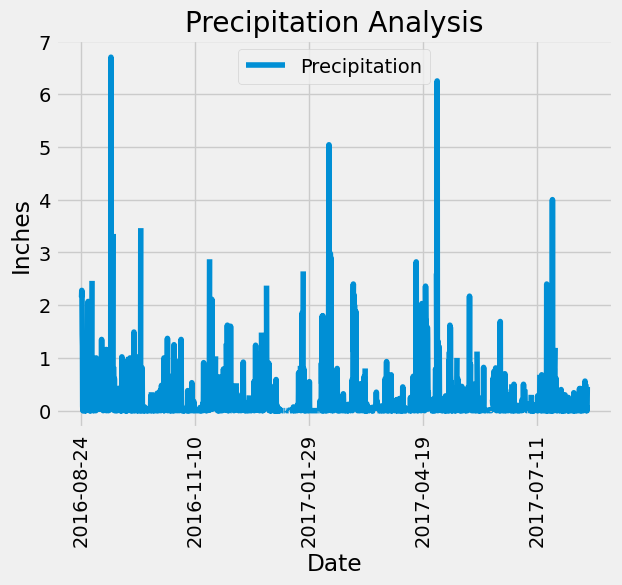

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

import pandas as pd
from sqlalchemy import and_

# Assuming 'most_recent_date' is a string in 'YYYY-MM-DD' format
# Calculate the date one year from the last date in the dataset
one_year_before = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
precipitation_data = session.query(*sel).filter(Measurement.date >= one_year_before).all()

# Save the query results as a Pandas DataFrame and set the column names
df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df.sort_values('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Analysis')
plt.show()



In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df['Precipitation'].describe()

print(summary_statistics)


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [19]:


# Query to count the number of unique stations
total_stations = session.query(func.count(Station.station)).scalar()
print(f"Total # of stations: {total_stations}")


Total # of stations: 9


In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Query to find the most active stations
most_active_stations = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())

# Display the stations and their counts in descending order
for station, count in most_active_stations:
    print( {station}, {count})

{'USC00519281'} {2772}
{'USC00519397'} {2724}
{'USC00513117'} {2709}
{'USC00519523'} {2669}
{'USC00516128'} {2612}
{'USC00514830'} {2202}
{'USC00511918'} {1979}
{'USC00517948'} {1372}
{'USC00518838'} {511}


In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
from sqlalchemy import func

# Assuming most_active_station_id contains the ID of the most active station
most_active_station_id = most_active_stations[0][0]

# Query to find the lowest, highest, and average temperature of the most active station
temperatures = (session.query(func.min(Measurement.tobs), 
                              func.max(Measurement.tobs), 
                              func.avg(Measurement.tobs))
                        .filter(Measurement.station == most_active_station_id)
                        .one())

lowest_temp, highest_temp, avg_temp = temperatures


print( {lowest_temp},{highest_temp},{avg_temp})


{54.0} {85.0} {71.66378066378067}


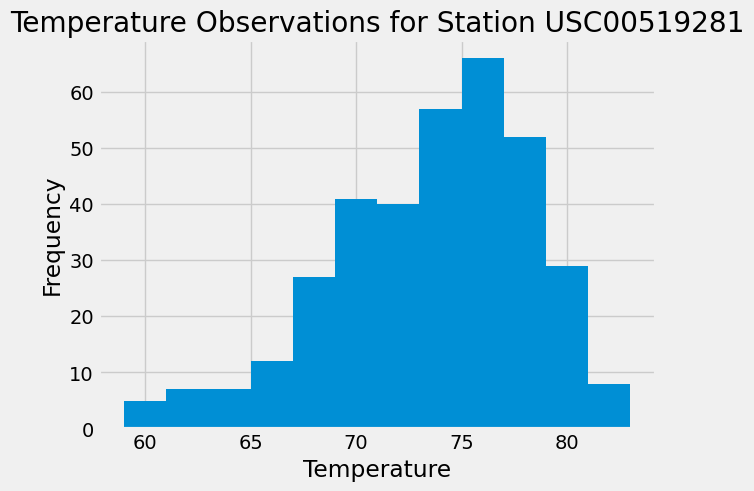

In [23]:

# Assuming 'most_recent_date' and 'most_active_station_id' are already defined
# Calculate the start date (12 months before the most recent date)
start_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
temperature_results = (session.query(Measurement.tobs)
                       .filter(Measurement.station == most_active_station_id)
                       .filter(Measurement.date >= start_date)
                       .all())

# Extract temperature observations from the query results
temperatures = [temp[0] for temp in temperature_results]

# Plot the results as a histogram for the most-active-station-id
plt.hist(temperatures, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f"Temperature Observations for Station {most_active_station_id}")
plt.show()


# Close Session

In [24]:
# Close Session
session.close()